# Seminar 4. SVM. PCA

# <center> Метод главных компонент

Постановки задачи метода главных компонент:
1. Выбор k наиболее дисперстных направлений.
2. Построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных.
3. Нахождение такой $k$-мерной плоскости в $d$-мерном признаковом пространстве, что ошибка проецирования объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $k$ главными компонентами.

![](https://drive.google.com/uc?export=view&id=1gzEMcSbH1KkMuv60TwkSS_n0QeamG7fA)

Решаемые задачи:
1. Снижение размерности.
2. Визуализация.
3. Предобработка данных

### Интуиция метода

Рассмотрим двухмерный пример, где вместо двух признаков можно завести их линейную комбинацию.

Для "хорошего" направления сумма расстояний до выбранной прямой (гиперплоскости) минимальна. Слева показано "хорошее" направление, справа – "плохое" - не можем различать признаки.

![](https://drive.google.com/uc?export=view&id=1KNOtJ3uv8sV2SI-2FRQeR8J6HGB1IgpQ)

### Сравнение с линейной регрессией

Отличие от линейной регрессии существенное, т.к в LR мы работаем с признаками и лейблами (MSE считаем по оси y).

![](https://drive.google.com/uc?export=view&id=1s7UKbdQ3Cn9nll_90TMTMHXayn1P5hZ6)

При хорошем проецировании дисперсия должна сохраняться.

# <center> Построение оптимального базиса:

PCA строит оптимальный базис, а не выбирает базисные вектора (признаки).

### Алгоритм PCA
1. Определить $k<n$ – новую размерность
2. Произвести нормировку = Вычесть из $X$ среднее, то есть заменить все $x^{(i)}$  на $ x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$
3. Привести данные к единичной дисперсии: посчитать $\sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$X = UDV^T$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $Z = XV \in \mathbb{R}^{m \times k}$

### Двухмерный пример

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


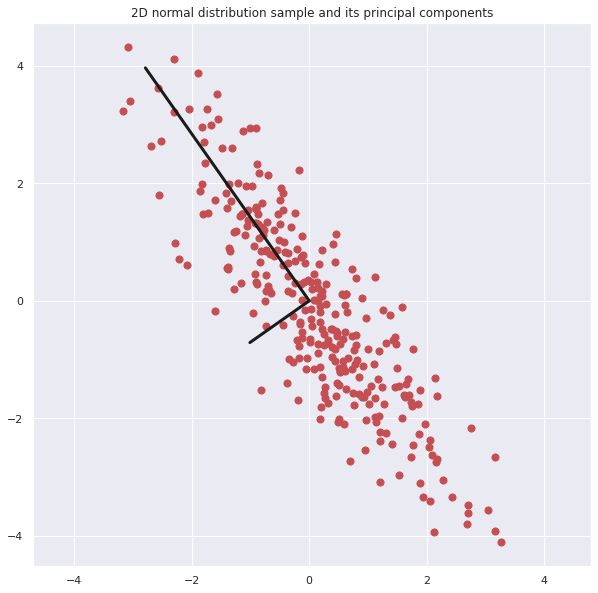

In [ ]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

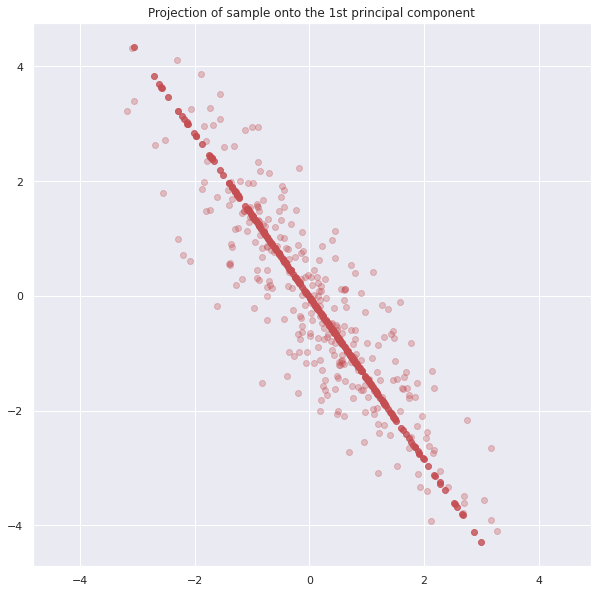

In [ ]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:
- На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
- На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
- На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности). 

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

Projecting 64-dimensional data to 2D


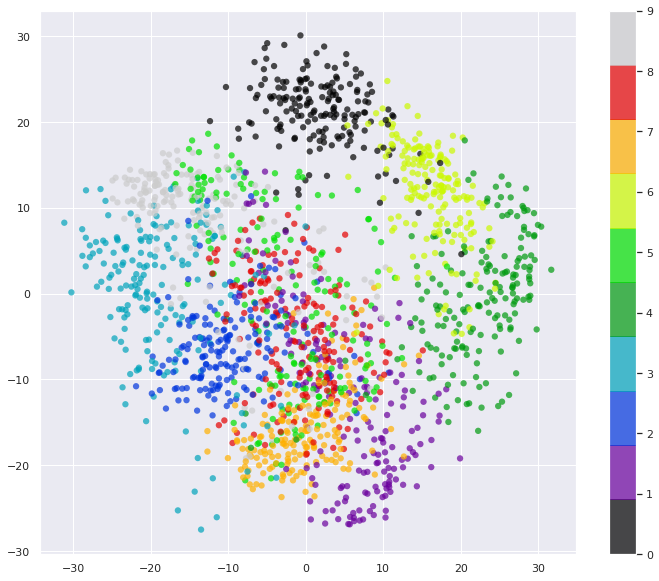

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

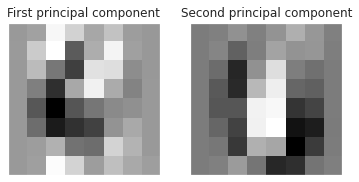

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Сжатие данных

Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

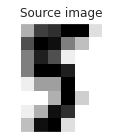

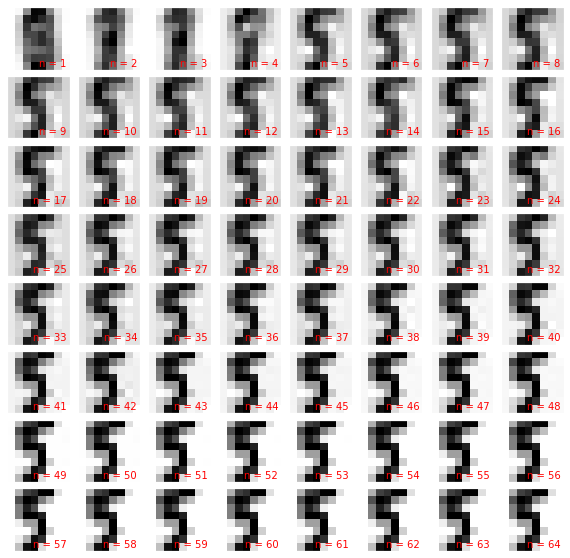

In [ ]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

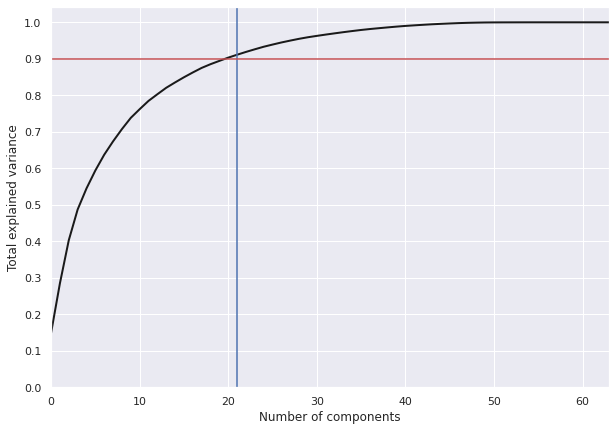

In [ ]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [ ]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### Предобработка данных

Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц. 

Для начала посмотрим на исходные данные.

In [ ]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)
    

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: user 11.3 s, sys: 3.38 s, total: 14.6 s
Wall time: 27.1 s


Распределение целевого класса:

In [ ]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


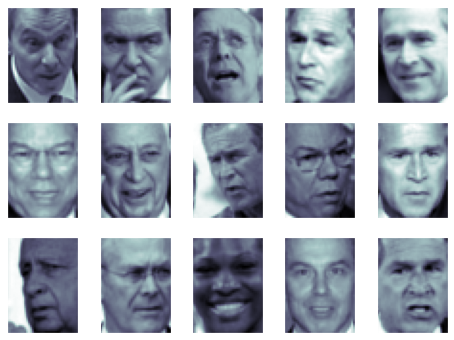

In [ ]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

100 principal components explain 92.70% of variance


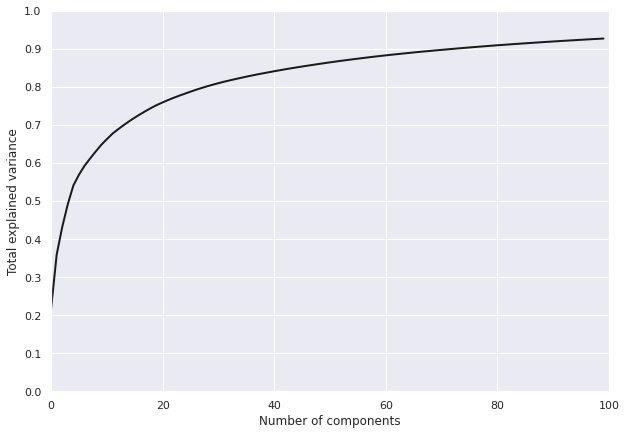

In [ ]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

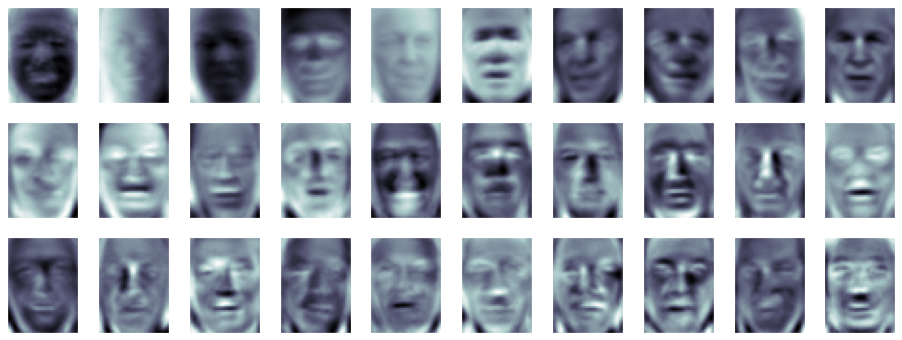

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA позволяет посмотреть на "среднее" лицо – тут считается среднее по каждому новому признаку.

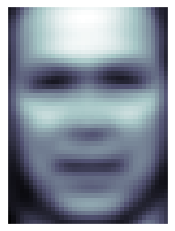

In [ ]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить  работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
%%time
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

CPU times: user 4.82 s, sys: 5.9 ms, total: 4.83 s
Wall time: 4.81 s


Accuracy: 0.766667
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.85      0.78      0.82        65
  Donald Rumsfeld       0.56      0.52      0.54        29
    George W Bush       0.83      0.90      0.86       133
Gerhard Schroeder       0.74      0.70      0.72        33
      Hugo Chavez       0.77      0.62      0.69        16
   Jacques Chirac       0.83      0.42      0.56        12
    Jean Chretien       0.70      0.70      0.70        10
    John Ashcroft       1.00      0.61      0.76        18
Junichiro Koizumi       0.48      0.91      0.62        11
  Serena Williams       0.93      0.68      0.79        19
       Tony Blair       0.66      0.79      0.72        29

         accuracy                           0.77       390
        macro avg       0.75      0.70      0.70       390
     weighted avg       0.78      0.77      0.77       390



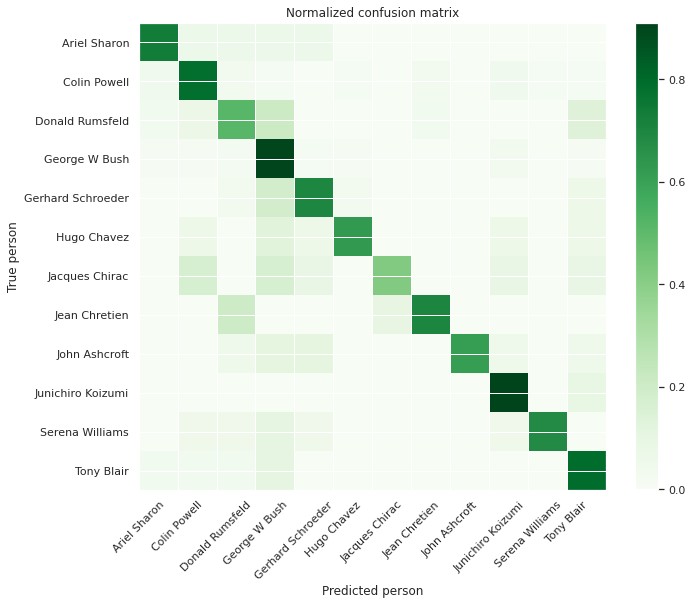

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

А теперь сравним с обучением на исходных данных

In [ ]:
%%time
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

CPU times: user 14.3 s, sys: 4.31 ms, total: 14.3 s
Wall time: 14.3 s


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy: %f" % accuracy_score(y_test, y_pred))

Accuracy: 0.794872


# Pictures compression using SVD
In this exercise you are supposed to study how SVD could be used in image compression.

_Based on open course in [Numerical Linear Algebra](https://github.com/oseledets/nla2018) by Ivan Oseledets_

In [ ]:
# If you are using colab, uncomment this cell

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/waiting.jpeg
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/mipt.jpg
! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/simpsons.jpg

! mkdir ../dataset
! mv -t ../dataset waiting.jpeg mipt.jpg simpsons.jpg

--2021-10-05 09:28:30--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/waiting.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40516 (40K) [image/jpeg]
Saving to: ‘waiting.jpeg’

waiting.jpeg        100%[===================>]  39.57K  --.-KB/s    in 0.003s  

2021-10-05 09:28:31 (14.5 MB/s) - ‘waiting.jpeg’ saved [40516/40516]

--2021-10-05 09:28:31--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/a5bf18c/datasets/mipt.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190845 (186K) [image/jpeg]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## 1. Singular values

Compute the singular values of some predownloaded image (via the code provided below) and plot them. Do not forget to use logarithmic scale.

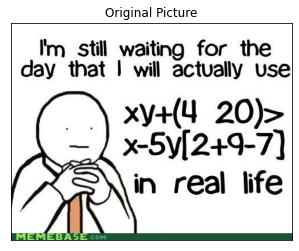

(385, 498, 3)


In [ ]:
face_raw = Image.open("../dataset/waiting.jpeg")
face = np.array(face_raw).astype(np.uint8)

plt.imshow(face_raw)
plt.xticks(())
plt.yticks(())
plt.title("Original Picture")
plt.show()
print(face.shape)

In [ ]:
# optional: zero mean the image


In [ ]:
# Image is saved as a 3-dimensional array with shape H x W x C (heigt x width x channels)
Rf = face[:,:,0]
Gf = face[:,:,1]
Bf = face[:,:,2]

# Compute SVD and plot the singular values for different image channels
u_r, Rs, vh_r = np.linalg.svd(Rf, full_matrices=False)
u_g, Gs, vh_g = np.linalg.svd(Gf, full_matrices=False)
u_b, Bs, vh_b = np.linalg.svd(Bf, full_matrices=False)

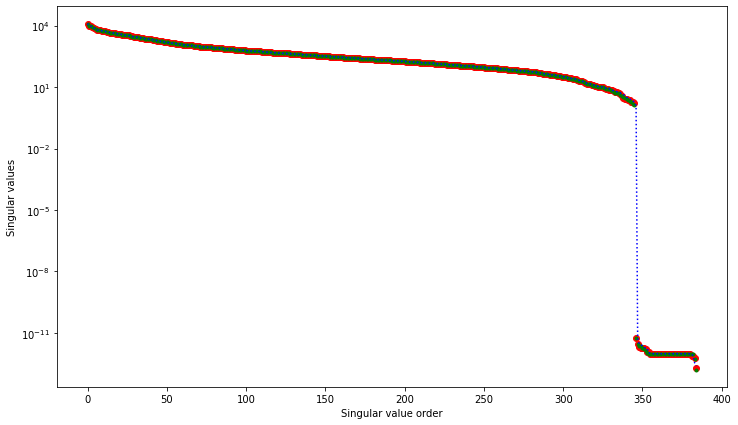

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(Rs,'ro')
plt.plot(Gs,'g.')
plt.plot(Bs,'b:')
plt.yscale('log')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")
plt.show()

## 2. Compress

Complete a function ```compress```, that performs SVD and truncates it (using $k$ singular values/vectors). See the prototype below. 

Note, that in case when your images are not grayscale you have to split your image to channels and work with matrices corresponding to different channels separately.

Plot approximate reconstructed image $M_\varepsilon$ of your favorite image such that $rank(M_\varepsilon) = 5, 20, 50$ using ```plt.subplots```.

In [ ]:
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)
    
    Parameters: 
        image (np.array):        input image (probably, colourful)
        
        k (int):                 approximation rank
        
    --------
    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)
      
      s (np.array):              array of singular values 
    """
    image2 = image.copy()
    
    Rf = image2[:,:,0]
    Gf = image2[:,:,1]
    Bf = image2[:,:,2]
    
    # compute per-channel SVD for input image
    # <your code here>
    
    # reconstruct the input image with the given approximation rank
    reduced_im = np.zeros(image.shape)
    # <your code here>
    
    reduced_im[..., 0] = red_channel
    reduced_im[..., 1] = green_channel
    reduced_im[..., 2] = blue_channel
    
    # save the array of top-k singular values
    s = np.zeros((len(Gs), 3))
    s[:, 0] = Rs
    s[:, 1] = Gs
    s[:, 2] = Bs
    
    return reduced_im.copy(), s

In [ ]:
plt.figure(figsize=(18,12))
for i,k in enumerate([350,300,250,200,150,100,50,20,1]):
    plt.subplot(3,3,i+1)
    im,s = compress(face,k)
    plt.imshow((im-im.min())/(im.max()-im.min()))
    plt.xticks(())
    plt.yticks(())
    plt.title("{} greatest SV".format(k))

## 3. Discover

Plot the following two figures for your favorite picture
* How relative error of approximation depends on the rank of approximation?
* How compression rate in terms of storing information ((singular vectors + singular numbers) / total size of image) depends on the rank of approximation?

In [ ]:
img, s = compress(face, k)

  0%|          | 0/493 [00:00<?, ?it/s]

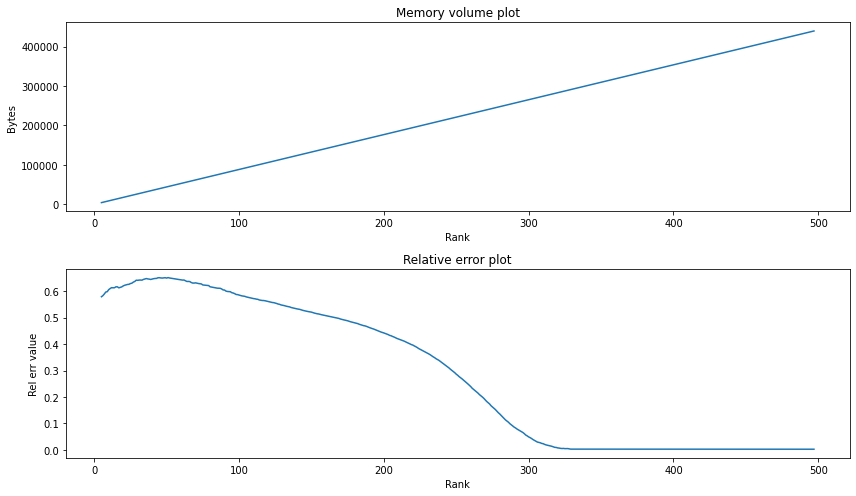

In [ ]:
# fancy progress bar
from tqdm.auto import tqdm

k_list = range(5, face.shape[1], 1)
rel_err = []
info = []
for k in tqdm(k_list, leave=False):
    img, s = compress(face, k)
    
    # <your code here>
    
    rel_err.append(current_relative_error)
    info.append(current_information)
    
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.title("Memory volume plot")
plt.xlabel("Rank")
plt.ylabel("Bytes")
plt.plot(k_list, info)

plt.subplot(2,1,2)
plt.title("Relative error plot")
plt.xlabel("Rank")
plt.ylabel("Rel err value")
plt.plot(k_list, rel_err)

plt.tight_layout()
plt.show()

## 4. Compare

 Consider the following two pictures. Compute their approximations (with the same rank, or relative error). What do you see? Explain results.

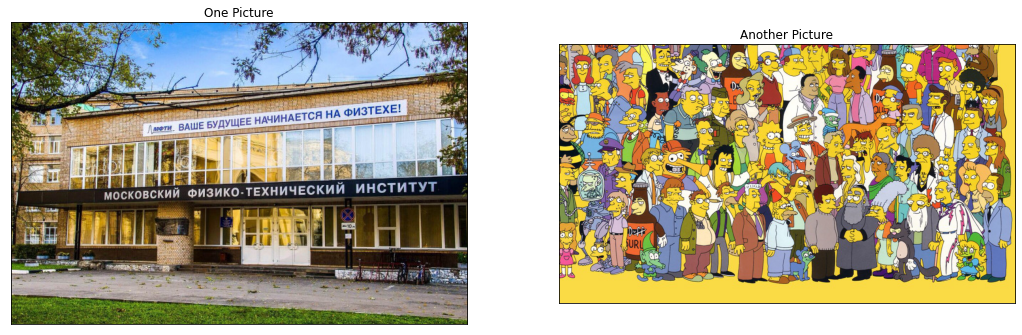

In [ ]:
image_raw1 = Image.open("../dataset/mipt.jpg")
image_raw2 = Image.open("../dataset/simpsons.jpg")

image1 = np.array(image_raw1).astype(np.uint8)
image2 = np.array(image_raw2).astype(np.uint8)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_raw1)
plt.title("One Picture")
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.imshow(image_raw2)
plt.title("Another Picture")
plt.xticks(())
plt.yticks(())

plt.show()

#### Same 

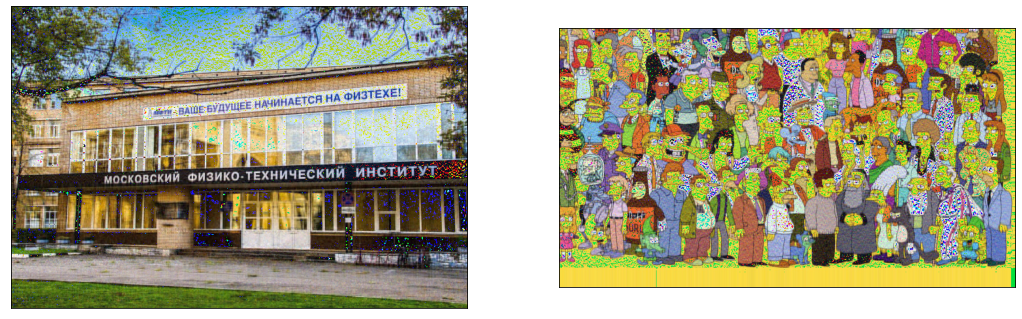

In [ ]:
im1, s = compress(image1, 100)
im2, s = compress(image2, 100)

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.imshow(Image.fromarray(im1, "RGB"))
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(Image.fromarray(im2, "RGB"))
plt.xticks(())
plt.yticks(())

plt.show()

#### Same relative error

  0%|          | 0/50 [00:00<?, ?it/s]

K1 = 305; K2 = 425


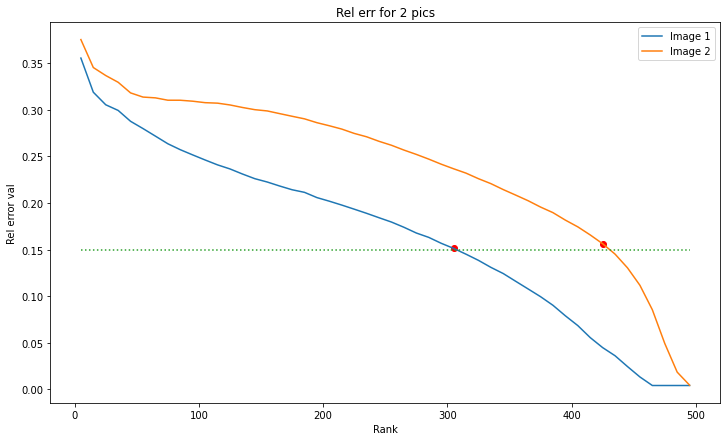

In [ ]:
k_list = range(5,500,10)
rel_err1 = []
rel_err2 = []
relative_error_threshold = 0.15

for k in tqdm(k_list):
  
    # Your code is here
    image1_compressed, s = compress(image1, k)
    image2_compressed, s = compress(image2, k)
    
    # <your code here>
    
    rel_err1.append(relative_error_1)
    rel_err2.append(relative_error_2)

# find the indices
idx1 = int(np.argwhere(np.diff(np.sign(np.array(rel_err1) - relative_error_threshold))).flatten())
idx2 = int(np.argwhere(np.diff(np.sign(np.array(rel_err2) - relative_error_threshold))).flatten())
print("K1 = {}; K2 = {}".format(k_list[idx1], k_list[idx2]))

plt.figure(figsize=(12,7))

plt.plot(k_list[idx1], rel_err1[idx1], 'ro')
plt.plot(k_list[idx2], rel_err2[idx2], 'ro')
plt.title("Rel err for 2 pics")
plt.xlabel("Rank")
plt.ylabel("Rel error val")

plt.plot(k_list, rel_err1, label="Image 1")
plt.plot(k_list, rel_err2, label="Image 2")
plt.plot(k_list, [relative_error_threshold]*len(k_list),":",)

plt.legend()
plt.show()

In [ ]:
relative_error_threshold = 0.15

idx1 = int(np.argwhere(np.diff(np.sign(np.array(rel_err1) - relative_error_threshold))).flatten())
idx2 = int(np.argwhere(np.diff(np.sign(np.array(rel_err2) - relative_error_threshold))).flatten())

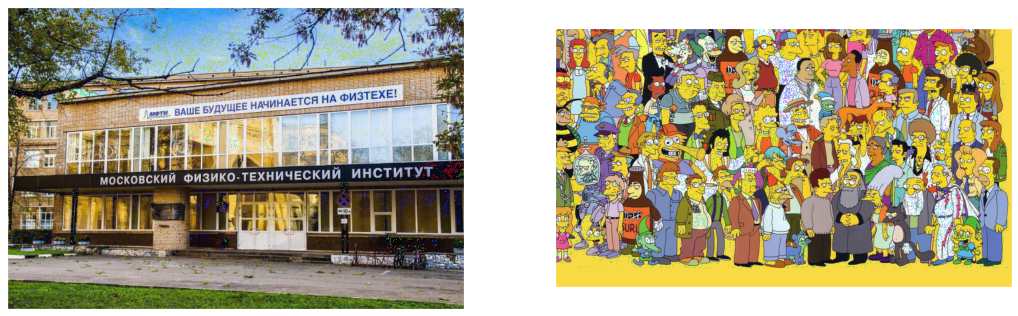

In [ ]:
image1_compressed, s = compress(image1, k_list[idx1])
image2_compressed, s = compress(image2, k_list[idx2])

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.imshow(Image.fromarray(image1_compressed, "RGB"))
plt.xticks(())
plt.yticks(())

plt.subplot(1,2,2)
plt.imshow(Image.fromarray(image2_compressed, "RGB"))
plt.xticks(())
plt.yticks(())
plt.show()

# SVM on pytorch

In [ ]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

import numpy as np
from scipy import stats

import torch
import torch.nn as nn
import torch.optim as optim

First let's create toy separable dataset 

In [ ]:
X, Y = make_blobs(n_samples=300, centers=2, random_state=45, cluster_std=0.6)
# <your code here> # for convenience with formulas

And plot it.

It's a separable problem

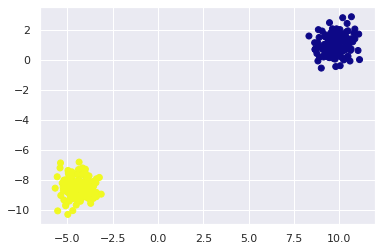

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')

## Support Vector Machines theory

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

## Playing with `sklearn`'s implementation

[original post](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

In [ ]:
model = SVC(kernel='linear', C=1e5)
model.fit(X, Y)

SVC(C=100000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

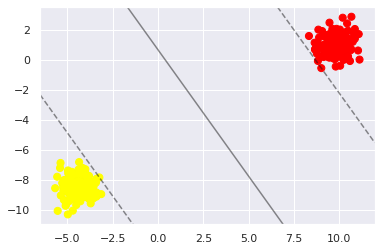

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[ 9.01725068, -0.56723264],
       [-3.23676301, -7.84961627]])

### Example with kernel from sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(100, factor=.1, noise=.1)
y[y == 0] = -1

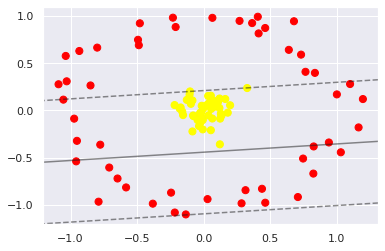

In [ ]:
# X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear', C=1e5).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
clf = SVC(kernel='poly', degree=20, C=1e6, max_iter=1e4)
y[y == 0] = -1
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=20, gamma='scale', kernel='poly',
    max_iter=10000.0, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

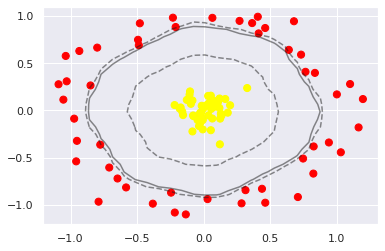

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Different margins for nonseparable cases

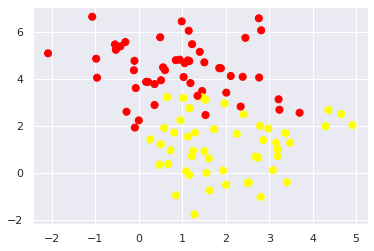

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

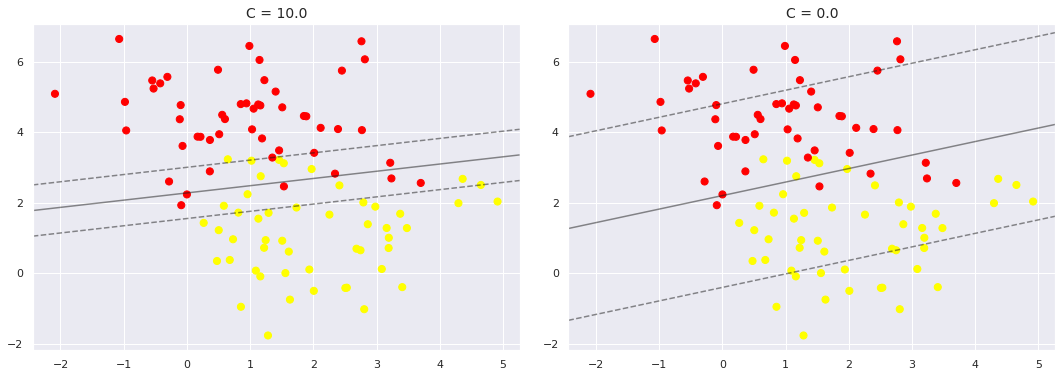

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
y[y == 0] = -1
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.005]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## SVM implementation with SGD

Let's code SVM with primal optimization problem and kernels on pytorch

Some parts were taken from [this notebook](https://github.com/nikhilraghava/PyTorch-SVM/blob/master/SVM%20-%20PyTorch.ipynb) 

In [ ]:
def hinge_loss(scores, labels):
    '''Mean loss for batch of objects
    '''
    assert len(scores.shape) == 1
    assert len(labels.shape) == 1
    return  ### YOUR CODE HERE


class SVM(BaseEstimator, ClassifierMixin):
    @staticmethod
    def linear(x_1, x_2):
        '''Computes linear kernel for batches of objects
        
        Args:
            x_1: array shaped `(#samples_1, #features)`
            x_2: array shaped `(#samples_2, #features)`
        Returns:
            kernel function values for all pairs of samples from x_1 and x_2
            shaped `(#samples_1, #samples_2)`
        '''
        return ### YOUR CODE HERE
    
    def __init__(
        self,
        lr: float=1e-3,
        epochs: int=2,
        batch_size: int=64,
        lmbd: float=1e-4,
        kernel_function=None,
        verbose: bool=False,
    ):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.lmbd = lmbd
        self.kernel_function = kernel_function or SVM.linear
        self.verbose = verbose
        self.fitted = False

    def __repr__(self):
        return 'SVM model, fitted: {self.fitted}'

    def fit(self, X, Y):
        assert (np.abs(Y) == 1).all()
        n_obj = len(X)
        X, Y = torch.FloatTensor(X), torch.FloatTensor(Y)
        K = self.kernel_function(X, X).float()

        self.betas = torch.full((n_obj, 1), fill_value=0.001, dtype=X.dtype, requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True)
        
        optimizer = optim.SGD((self.betas, self.bias), lr=self.lr)
        for epoch in range(self.epochs):
            perm = torch.randperm(n_obj)  # Generate a set of random numbers of length: sample size
            sum_loss = 0.                 # Loss for each epoch
            for i in range(0, n_obj, self.batch_size):
                batch_inds = perm[i:i + self.batch_size]
                x_batch = X[batch_inds]   # Pick random samples by iterating over random permutation
                y_batch = Y[batch_inds]   # Pick the correlating class
                k_batch = K[batch_inds]
                
                optimizer.zero_grad()     # Manually zero the gradient buffers of the optimizer
                
                preds =  ### YOUR CODE HERE # Compute the output by doing a forward pass
                preds = preds.flatten()
                loss = self.lmbd * self.betas[batch_inds].T @ k_batch @ self.betas + hinge_loss(preds, y_batch)
                loss.backward()           # Backpropagation
                optimizer.step()          # Optimize and adjust weights

                sum_loss += loss.item()   # Add the loss

            if self.verbose: print("Epoch " + str(epoch) + ", Loss: " + str(sum_loss / self.batch_size))

        self.X = X
        self.fitted = True
        return self

    def predict_scores(self, batch):
        with torch.no_grad():
            batch = torch.from_numpy(batch).float()
            K = self.kernel_function(batch, self.X)
            return  ### YOUR CODE HERE

    def predict(self, batch):
        scores = self.predict_scores(batch)
        answers = np.full(len(batch), -1, dtype=np.int64)
        answers[scores > 0] = 1
        return answers

In [ ]:
model = SVM(epochs=10, verbose=True)

In [ ]:
model.fit(X, y)

Epoch 0, Loss: 0.04368753917515278
Epoch 1, Loss: 0.039085013791918755
Epoch 2, Loss: 0.03917980473488569
Epoch 3, Loss: 0.020102158188819885
Epoch 4, Loss: 0.015542648732662201
Epoch 5, Loss: 0.02088063210248947
Epoch 6, Loss: 0.014417887199670076
Epoch 7, Loss: 0.011824265588074923
Epoch 8, Loss: 0.013880976475775242
Epoch 9, Loss: 0.01654867734760046


SVM model, fitted: {self.fitted}

In [ ]:
predictions = model.predict(X)
predictions.shape

(100,)

In [ ]:
accuracy_score(y, predictions)

0.82

# Полезные ссылки
- [Формальное описание PCA](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)
- [PCA in 3 steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [SVD](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)
- [Eigenface](https://en.wikipedia.org/wiki/Eigenface)
- [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)